# Functies

In [13]:
import numpy as np
import math
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from dateutil import parser, relativedelta

# hip to origin, recalculate all other points with that translation
def x_translation (x_ver, row):
    x_ch = row['x']
    x_n = x_ch - x_ver
    return  x_n

def z_translation (z_ver, row):
    z_ch = row['z']
    z_n = z_ch - z_ver
    return z_n

# calculate arc that the body needs to rotate to get both hips on the same z-coordinate
def define_arc(frame):
    x_right = float(frame.loc[frame['jointName'] == "HipRight", 'x_schuif'])
    x_left = float(frame.loc[frame['jointName'] == "HipLeft", 'x_schuif'])
    z_right = float(frame.loc[frame['jointName'] == "HipRight", 'z_schuif'])
    z_left = float(frame.loc[frame['jointName'] == "HipLeft", 'z_schuif'])
    
    arc = math.atan(abs(z_right-z_left)/abs(x_right-x_left))
    return arc

# rotate a given point and calculate new x and new z
def rotate_body_x(row, arc):
    new_x = (math.cos(arc) * float(row['x_schuif'])) + (math.sin(arc) * float(row['z_schuif']))
    return new_x

def rotate_body_z(row, arc):
    new_z = (math.cos(arc) * float(row['z_schuif'])) - (math.sin(arc) * float(row['x_schuif'])) 
    return new_z


################
# Calculate arc
################

def arc_elbow(frame, side):
    spineShoulder = np.matrix([[float(frame.loc[frame['jointName'] == 'SpineShoulder', 'x_rotated'])], 
                               [float(frame.loc[frame['jointName'] == 'SpineShoulder', 'y'])]])
    spineMid = np.matrix([[float(frame.loc[frame['jointName'] == 'SpineMid', 'x_rotated'])], 
                               [float(frame.loc[frame['jointName'] == 'SpineMid', 'y'])]])
    
    spineMid_new = spineMid - spineShoulder
    
    if side == 'r':
        # right side
        jointName_shoulder = "ShoulderRight"
        jointName_elbow = "ElbowRight"
    else:
        # left side
        jointName_shoulder = "ShoulderLeft"
        jointName_elbow = "ElbowLeft"
    
    shoulder = np.matrix([[float(frame.loc[frame['jointName'] == jointName_shoulder, 'x_rotated'])], 
                        [float(frame.loc[frame['jointName'] == jointName_shoulder, 'y'])]])
    elbow = np.matrix([[float(frame.loc[frame['jointName'] == jointName_elbow, 'x_rotated'])], 
                        [float(frame.loc[frame['jointName'] == jointName_elbow, 'y'])]])

    elbow_new = elbow - shoulder

    sum_vectors = np.dot(np.transpose(spineMid_new), elbow_new)
    multiplication_lengths = np.linalg.norm(spineMid_new) * np.linalg.norm(elbow_new)

    cos_alpha = sum_vectors / multiplication_lengths
    alpha = np.arccos(cos_alpha) * 180 / math.pi
    return alpha

def relative_time(row, frame):
    index = frame.index.get_loc(row.name)
    
    if index == 0:
        return 0
    
    first_row = frame.iloc[0]
    time1 = row['time']
    time2 = first_row['time']
    
    dt1 = parser.parse(time1)
    dt2 = parser.parse(time2)
    delta = relativedelta.relativedelta(dt1, dt2)
    microseconds = delta.seconds * 1000000 + delta.microseconds
    return microseconds

def normalized_time(row, frame):
    total_time = frame['relativeTime'].max()
    
    relative_time = row['relativeTime']
    normalized = relative_time/total_time
    return normalized

# Berekenen

1


/opt/jupyterhub/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/jupyterhub/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/jupyterhub/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-do

      Unnamed: 0  pNum  eNum  frameNum      jointName         x         y  \
8          16683     1     1       668  ShoulderRight  0.541840  0.195309   
33         16708     1     1       669  ShoulderRight  0.541738  0.195432   
58         16733     1     1       670  ShoulderRight  0.541586  0.195422   
83         16758     1     1       671  ShoulderRight  0.541769  0.196098   
108        16783     1     1       672  ShoulderRight  0.541149  0.196042   
133        16808     1     1       673  ShoulderRight  0.540714  0.195933   
158        16833     1     1       674  ShoulderRight  0.541257  0.195519   
183        16858     1     1       675  ShoulderRight  0.539763  0.195432   
208        16883     1     1       676  ShoulderRight  0.538975  0.195394   
233        16908     1     1       677  ShoulderRight  0.542907  0.196070   
258        16933     1     1       678  ShoulderRight  0.544106  0.199214   
283        16958     1     1       679  ShoulderRight  0.545302  0.200985   

/opt/jupyterhub/anaconda/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


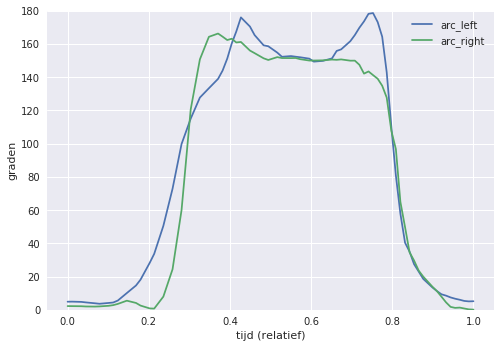

In [12]:
import math 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# import data 
df = pd.read_csv('cleanedData.csv')      #('combined_P1-5_E1.csv')    # ('/data/pepper/combined.csv')

for person in range(1, 2):
    print(str(person))
    # gets data from 1 person
    one_p = df.loc[df['pNum'] == person]
    one_e = one_p

    ###################
    # ROTATE BODY
    ###################
    # create empty DataFrame
    index = np.arange(0)
    frames = pd.DataFrame(index=index)
    frames = frames.fillna(0) # with 0s rather than NaNs

    # get min and max frameNum
    frame_max = int(one_e['frameNum'].max())
    frame_min = int(one_e['frameNum'].min())

    found = False
    
    for i in range(frame_min, frame_max + 1):   
        frame = one_e.loc[one_e['frameNum'] == i]

        try:
            x_ver = float(frame.loc[frame['jointName'] == "HipRight", 'x'])
            z_ver = float(frame.loc[frame['jointName'] == "HipRight", 'z'])

            # schuiven
            frame['x_schuif'] = frame.apply (lambda row: x_translation(x_ver, row),axis=1)
            frame['z_schuif'] = frame.apply (lambda row: z_translation(z_ver, row),axis=1)

            #draaien
            arc = define_arc(frame)
            frame['x_rotated'] = frame.apply (lambda row: rotate_body_x(row, arc),axis=1)
            frame['z_rotated'] = frame.apply (lambda row: rotate_body_z(row, arc),axis=1)

            #samenvoegen
            # all frames from one person are rotated
            frames = frames.append(frame)
            found = True
        except:
            found = False
            print('BUG')
        
    ###################
    # CALCULATE ARCS
    ###################
    if found == True:
        # create empty DataFrame
        index = np.arange(0)
        columns = ['pNum', 'eNum', 'frameNum', 'time', 'arc_right', 'arc_left']
        arcs = pd.DataFrame(index=index, columns=columns)
        arcs = arcs.fillna(0) # with 0s rather than NaNs

        frame_max_2 = frames['frameNum'].max()
        frame_min_2 = frames['frameNum'].min()

        for i in range(frame_min_2, frame_max_2 + 1): 
            frame = frames.loc[frames['frameNum'] == i]
            right_arc = arc_elbow(frame, 'r')
            left_arc = arc_elbow(frame, 'l')
            time = frame.loc[frame['jointName'] == 'SpineBase', 'time']
            time = time[time.first_valid_index()]
            row = {'pNum': person, 'eNum': person, 'frameNum': i, 'time': time, 'arc_right': right_arc[0,0], 'arc_left': left_arc[0,0]}
            arcs = arcs.append(row, ignore_index=True)

        ##################
        # NORMALIZE TIME
        ##################

        arcs['relativeTime'] = arcs.apply (lambda row: relative_time(row, arcs),axis=1)
        arcs['normalized'] = arcs.apply (lambda row: normalized_time(row, arcs), axis=1)

        plt.plot(arcs['normalized'], arcs['arc_left'])
        plt.plot(arcs['normalized'], arcs['arc_right'])
        
        plt.xlabel('tijd (relatief)')
        plt.ylabel('graden')
        plt.ylim((0,180))
        plt.legend()
        plt.savefig('/home/13040367/notebooks/Figures/Grafieken_3/grafiek_P' + str(person) + '_ex1_v2')    
        plt.show()
    else:
        print('BUG')